In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
le = LabelEncoder()
des= pd.read_csv('kidney_disease.csv')
des['rbc'] = le.fit_transform(des['rbc'])
des['pc'] = le.fit_transform(des['pc'])
des['pcc'] = le.fit_transform(des['pcc'])
des['ba'] = le.fit_transform(des['ba'])
des['htn'] = le.fit_transform(des['htn'])
des['dm'] = le.fit_transform(des['dm'])
des['cad'] = le.fit_transform(des['cad'])
des['appet'] = le.fit_transform(des['appet'])
des['pe'] = le.fit_transform(des['pe'])
des['ane'] = le.fit_transform(des['ane'])
des = des.drop(columns=[ 'id'])
des = des.fillna(0)

des

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44,7800,5.2,1,4,1,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,0.0,...,38,6000,0,0,3,1,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,0,0,4,1,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,3,1,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,3,1,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47,6700,4.9,0,3,1,0,0,0,notckd
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54,7800,6.2,0,3,1,0,0,0,notckd
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49,6600,5.4,0,3,1,0,0,0,notckd
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51,7200,5.9,0,3,1,0,0,0,notckd


In [12]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank = bank.drop(columns=['ID', 'ZIP Code', 'Online'])


In [13]:
des.replace('?', np.nan, inplace=True)
des.replace('\t?', np.nan, inplace=True)
X = des['classification']
y = des.drop(columns=['classification'])
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(
    X, y, test_size=0.2
)
X_age_test, X_age_validate, y_age_test, y_age_validate = train_test_split(
    X_age_test, y_age_test, test_size=0.5
)

des

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44,7800,5.2,1,4,1,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,0.0,...,38,6000,0,0,3,1,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,0,0,4,1,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,3,1,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,3,1,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47,6700,4.9,0,3,1,0,0,0,notckd
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54,7800,6.2,0,3,1,0,0,0,notckd
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49,6600,5.4,0,3,1,0,0,0,notckd
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51,7200,5.9,0,3,1,0,0,0,notckd


# Pytorch instead of tensorflow

I've heard much better things about pythorch and I am more familiar with it from using it at a higher level through huggingface

They also support better hardware interface for example you can choose the exact device you want

In [14]:

X = bank.drop(columns=['Personal Loan'])
y = bank['Personal Loan']


X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(
    X, y, test_size=0.2
)

scaler = StandardScaler()
X_bank_train = scaler.fit_transform(X_bank_train)
X_bank_test = scaler.transform(X_bank_test)


In [15]:

X_train_tensor = torch.tensor(X_bank_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_bank_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_bank_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_bank_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


/tmp/ipykernel_9455/2961307246.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


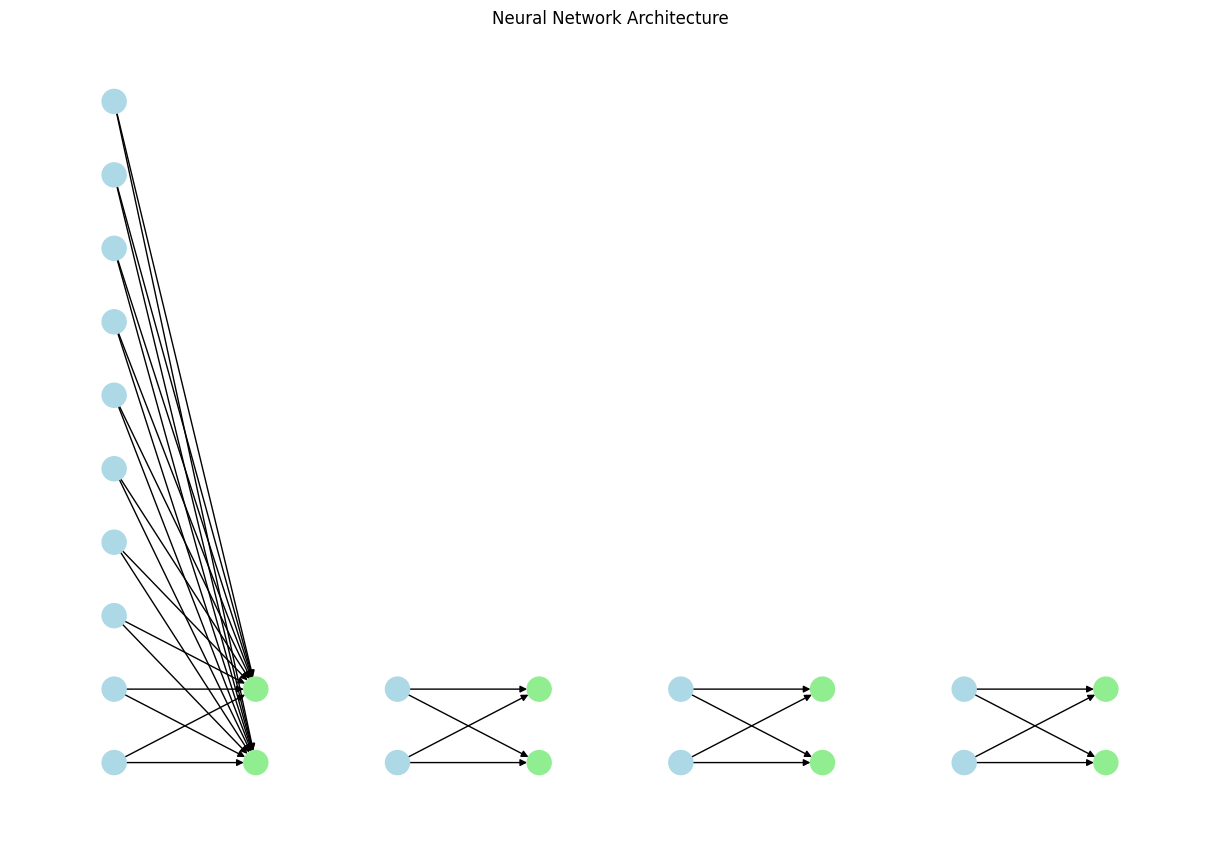

Sequential(
  (0): Linear(in_features=10, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=2, bias=True)
  (7): Softmax(dim=1)
)

In [16]:
input_size = X_bank_train.shape[1]

"""model = nn.Sequential( # Adding 30 layers in the middle didn't change much
    nn.Linear(input_size, 24),
    nn.ReLU(),
    nn.Linear(24, 300),
    nn.ReLU(),
    nn.Linear(300, 30),
    nn.ReLU(),
    nn.Linear(30, 100),
    nn.ReLU(),
    nn.Linear(100, 2),
    nn.Softmax(dim=1)
)
"""
#smaller network seems to perform better
model = nn.Sequential( 
    nn.Linear(input_size, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.ReLU(),
    nn.Linear(2, 2),
    nn.Softmax(dim=1)
)
import matplotlib.pyplot as plt
import networkx as nx

def visualize_network(model):
    G = nx.DiGraph()
    layers = list(model.children())
    
    node_count = 0
    for i, layer in enumerate(layers):
        if isinstance(layer, nn.Linear):
            input_size = layer.in_features
            output_size = layer.out_features
            
            for j in range(input_size):
                G.add_node(f"L{i}_I{j}", pos=(i, j), color='lightblue')
                node_count += 1
            
            for j in range(output_size):
                G.add_node(f"L{i+1}_O{j}", pos=(i+1, j), color='lightgreen')
                node_count += 1
            
            for j in range(input_size):
                for k in range(output_size):
                    G.add_edge(f"L{i}_I{j}", f"L{i+1}_O{k}")
    
    pos = nx.get_node_attributes(G, 'pos')
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=colors, with_labels=False, node_size=300, arrows=True)
    plt.title("Neural Network Architecture")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_network(model)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


In [17]:
criterion = nn.CrossEntropyLoss()

#optimizer = optim.Adam(model.parameters(), lr=0.01) # 90%
#optimizer = optim.AdamW(model.parameters(), lr=0.01) # 98%
optimizer = optim.NAdam(model.parameters(), lr=0.01) # 98%
#optimizer = optim.SGD(model.parameters(), lr=0.01) # 89.5%
#optimizer = optim.RMSprop(model.parameters(), lr=0.01) # 97%
#optimizer = optim.Adagrad(model.parameters(), lr=0.01) # 97.4%


In [18]:
num_epochs = 150

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * batch_X.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


Epoch [1/150], Loss: 0.5033
Epoch [10/150], Loss: 0.3369
Epoch [20/150], Loss: 0.3322
Epoch [30/150], Loss: 0.3308
Epoch [40/150], Loss: 0.3308
Epoch [50/150], Loss: 0.3319
Epoch [60/150], Loss: 0.3338
Epoch [70/150], Loss: 0.3323
Epoch [80/150], Loss: 0.3319
Epoch [90/150], Loss: 0.3317
Epoch [100/150], Loss: 0.3300
Epoch [110/150], Loss: 0.3312
Epoch [120/150], Loss: 0.3298
Epoch [130/150], Loss: 0.3306
Epoch [140/150], Loss: 0.3300
Epoch [150/150], Loss: 0.3306


In [19]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

model

Test Accuracy: 98.40%


Sequential(
  (0): Linear(in_features=10, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=2, bias=True)
  (7): Softmax(dim=1)
)

In [20]:
# Define a sample input
sample_input = torch.tensor([
    [19, 2, 10, 0, 0, 2, 0, 0, 0, 0]  # Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, CreditCard
], dtype=torch.float32).to(device)

# Ensure the model is in evaluation mode
model.eval()

# Make a prediction
with torch.no_grad():
    output = model(sample_input)
    probabilities = output.squeeze()
    predicted_class = torch.argmax(probabilities).item()

# Print the results
print("Probabilities:")
print(f"Class 0 (No loan): {probabilities[0].item():.4f}")
print(f"Class 1 (Loan): {probabilities[1].item():.4f}")
print(f"Predicted class: {predicted_class}")
print(f"This customer is {'likely' if predicted_class == 1 else 'unlikely'} to accept a personal loan.")


Probabilities:
Class 0 (No loan): 1.0000
Class 1 (Loan): 0.0000
Predicted class: 0
This customer is unlikely to accept a personal loan.
